In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

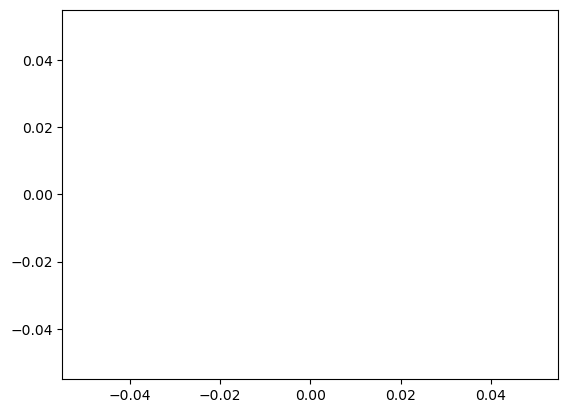

In [3]:
plt.plot();

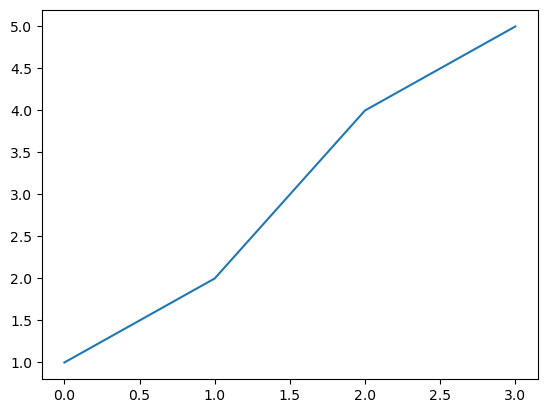

In [9]:
plt.plot([1, 2, 4, 5]);
plt.show()

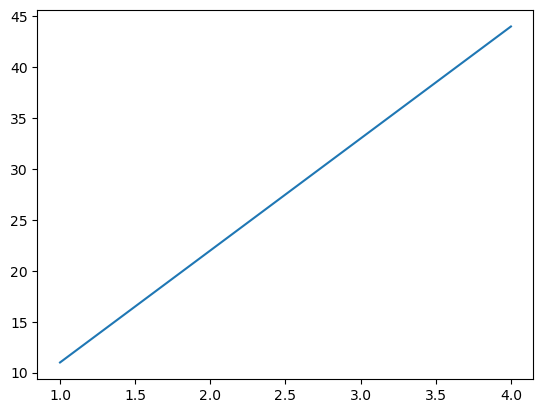

In [10]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y); # stateless way of plotting

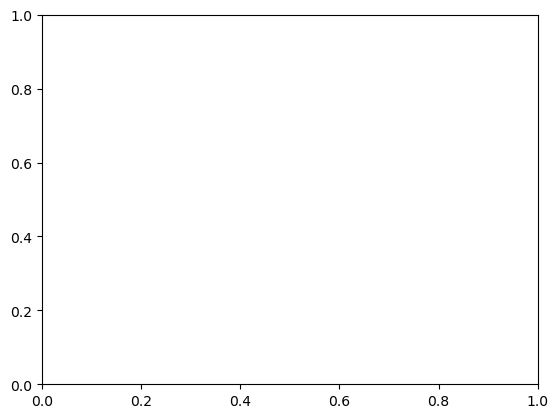

In [12]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

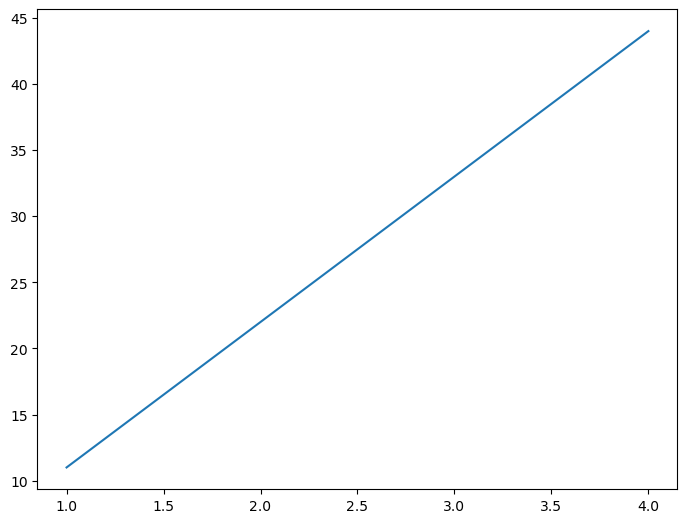

In [13]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

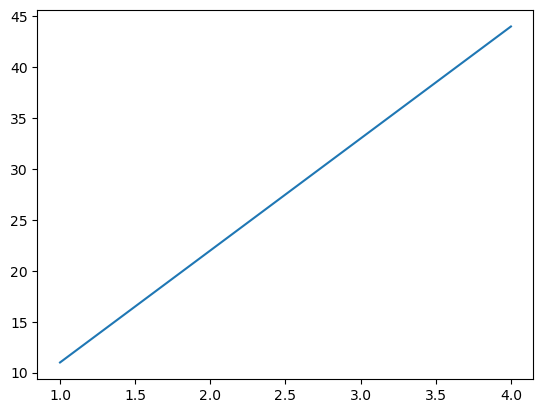

In [16]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y);
type(fig), type(ax)

## Matplotlib example workflow

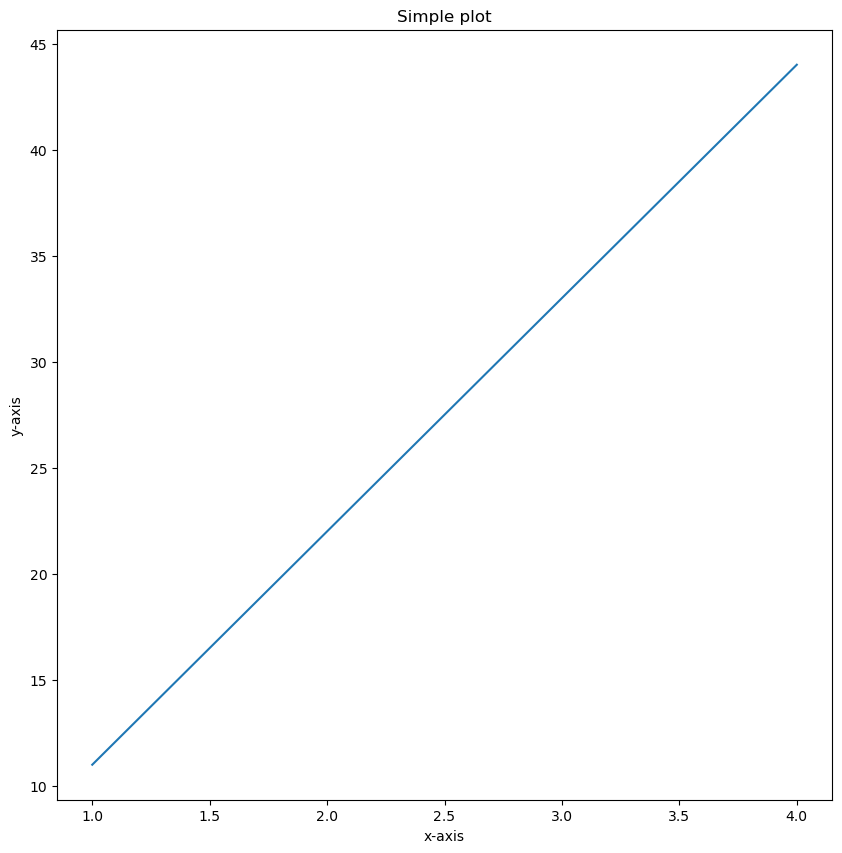

In [21]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline 
import matplotlib.pyplot as plt

# 1. Prepare data 
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data  
ax.plot(x, y)

# 4. Customize plot
ax.set(title = "Simple plot",
       xlabel = "x-axis",
       ylabel = "y-axis")

# 5. Save & show (you have to save the whole figure)
fig.savefig("images/sample-plot.png")

## Making figures with NumPy arrays

We want:

- Scatter plot
- Line plot
- Bar plot
- Histogram
- Subplots

In [22]:
import numpy as np

In [24]:
# create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

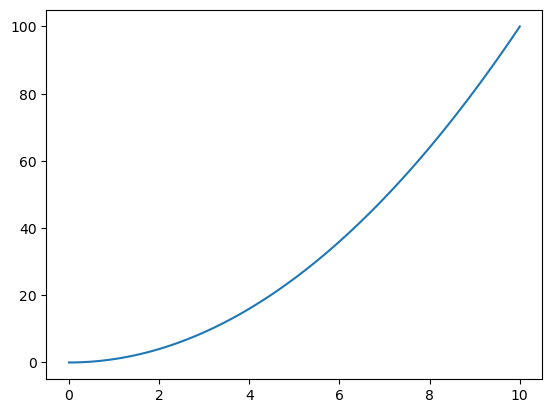

In [27]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

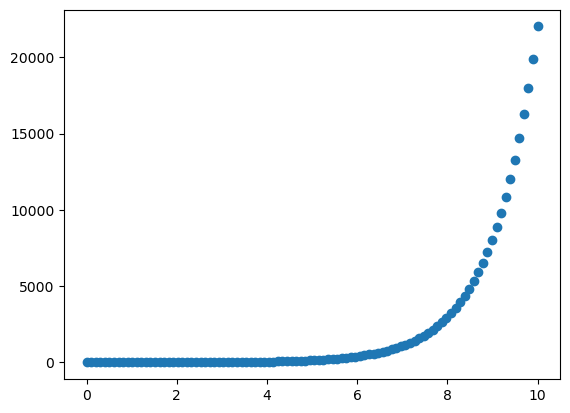

In [29]:
# Use the same data to create a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

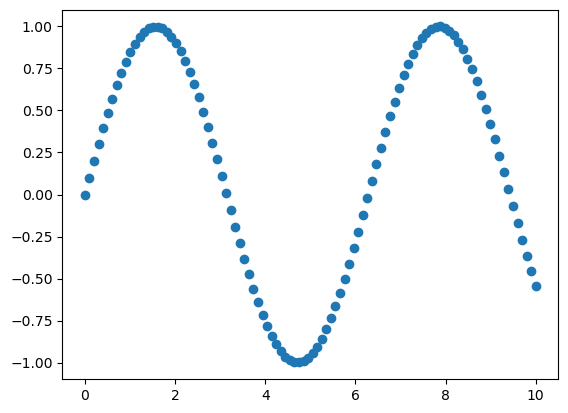

In [30]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

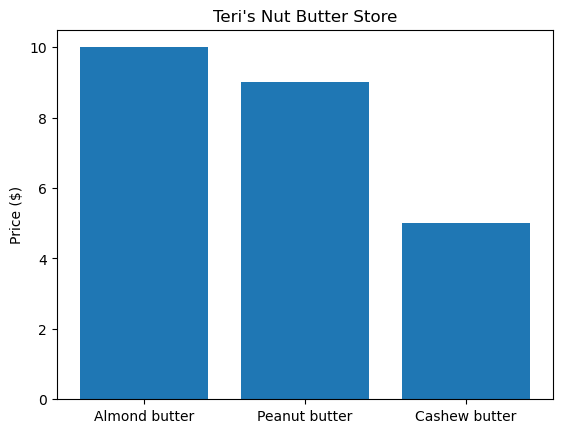

In [33]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10, "Peanut butter": 9, "Cashew butter": 5}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title = "Teri's Nut Butter Store",
       ylabel = "Price ($)"
      );

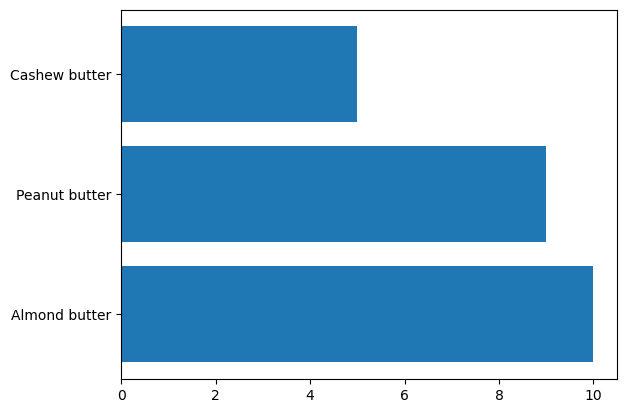

In [35]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

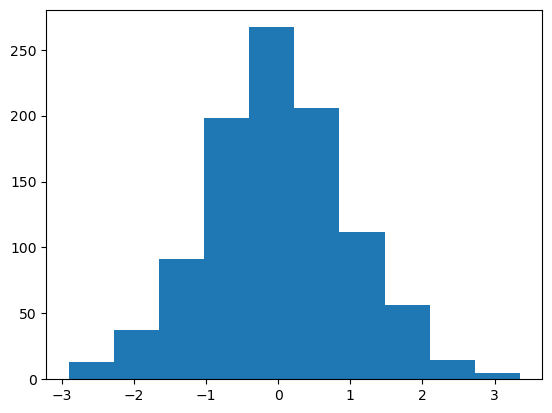

In [38]:
# Make some histogram data and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()

ax.hist(x);

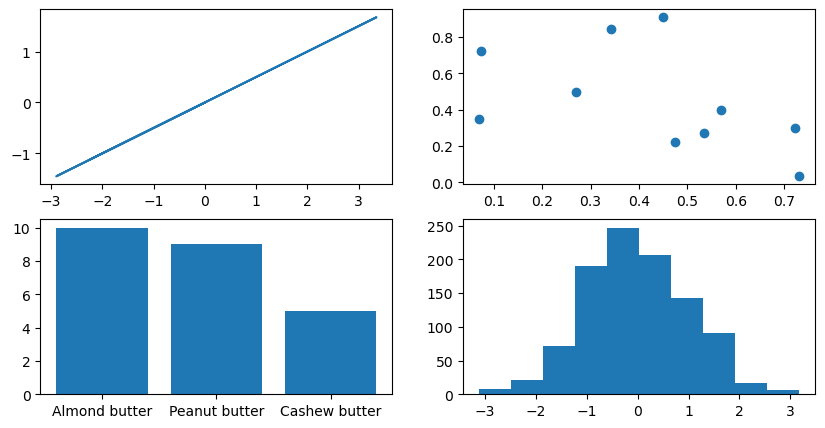

In [46]:
# subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize = (10, 5)
)

# Plot to each different axes
ax1.plot(x, x / 2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

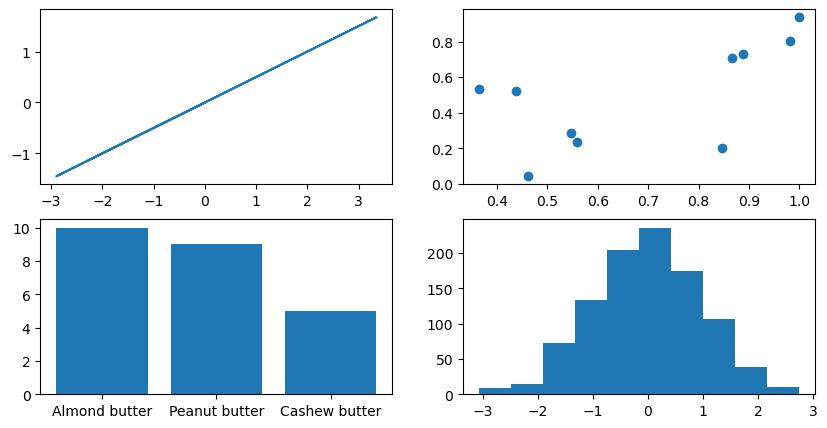

In [51]:
# subplots option 2
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 2, 
                       figsize = (10, 5))

# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from Pandas DataFrame

In [52]:
import pandas as pd

In [53]:
# Make a dataframe
car_sales = pd.read_csv("car_sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


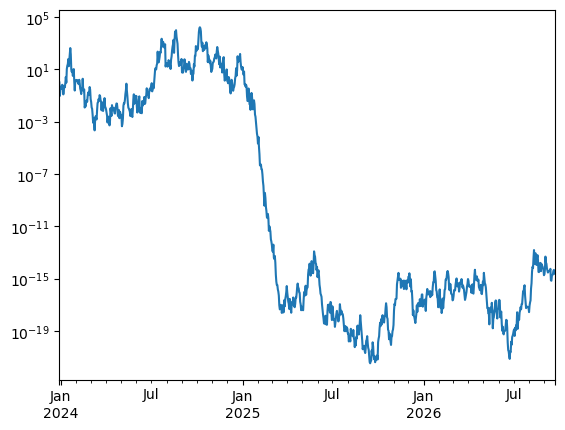

In [55]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("12/29/2023", periods=1000))

ts = np.exp(ts.cumsum())

ts.plot(logy=True);

In [56]:
# Adjust the price value and remove the $ and decimal
car_sales['Price']=car_sales['Price'].str.replace('$','',regex=False).str.replace(',','',regex=False).astype(float).astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [59]:
type(car_sales["Price"][0])

numpy.int64

In [60]:
car_sales["Sale Date"] = pd.date_range("1/1/2023", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2023-01-01
1,Honda,Red,87899,4,5000,2023-01-02
2,Toyota,Blue,32549,3,7000,2023-01-03
3,BMW,Black,11179,5,22000,2023-01-04
4,Nissan,White,213095,4,3500,2023-01-05
5,Toyota,Green,99213,4,4500,2023-01-06
6,Honda,Blue,45698,4,7500,2023-01-07
7,Honda,Blue,54738,4,7000,2023-01-08
8,Toyota,White,60000,4,6250,2023-01-09
9,Nissan,White,31600,4,9700,2023-01-10


In [62]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,9000
2,Toyota,Blue,32549,3,7000,2023-01-03,16000
3,BMW,Black,11179,5,22000,2023-01-04,38000
4,Nissan,White,213095,4,3500,2023-01-05,41500
5,Toyota,Green,99213,4,4500,2023-01-06,46000
6,Honda,Blue,45698,4,7500,2023-01-07,53500
7,Honda,Blue,54738,4,7000,2023-01-08,60500
8,Toyota,White,60000,4,6250,2023-01-09,66750
9,Nissan,White,31600,4,9700,2023-01-10,76450


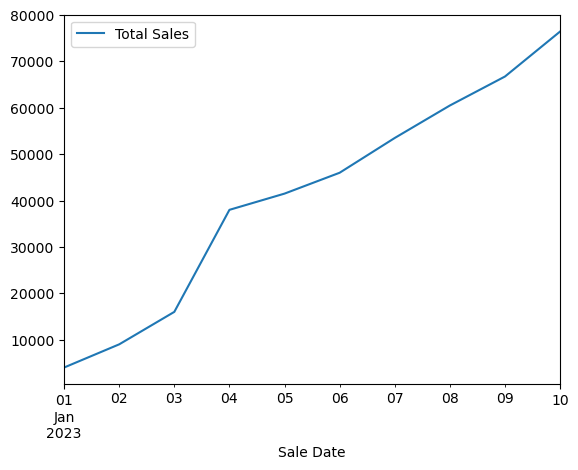

In [69]:
# Let's plot the total sales
car_sales.plot(x = "Sale Date", y = "Total Sales");

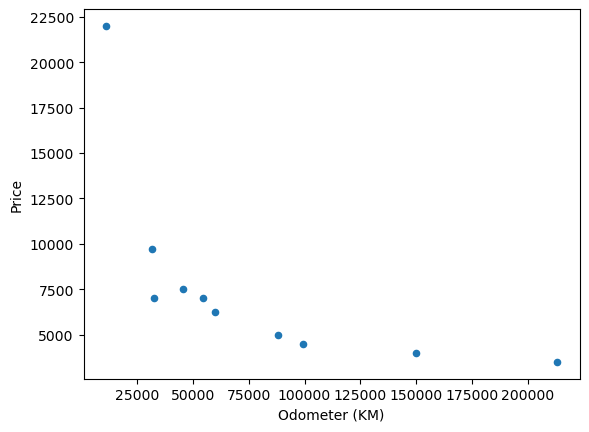

In [66]:
car_sales.plot(x="Odometer (KM)", y = "Price", kind = "scatter");

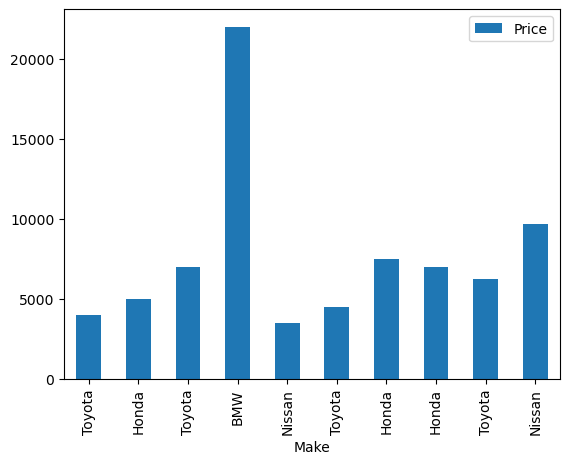

In [70]:
car_sales.plot(x = "Make", y = "Price", kind = "bar");

In [87]:
# how about a bar graph?
x = np.random.randn(10, 4)
x

# turn it into a dataframe
df = pd.DataFrame(x, columns = ["a", "b", "c", "d"])
df.head(5)

,a,b,c,d
0,-0.056321,0.205948,-0.005217,-0.768250
1,1.191770,-0.735969,-0.639512,0.858412
2,0.342980,0.447667,1.350028,0.216747
3,-0.447096,-1.561970,0.406718,0.046113
4,-0.030833,0.186101,-0.777455,1.515116


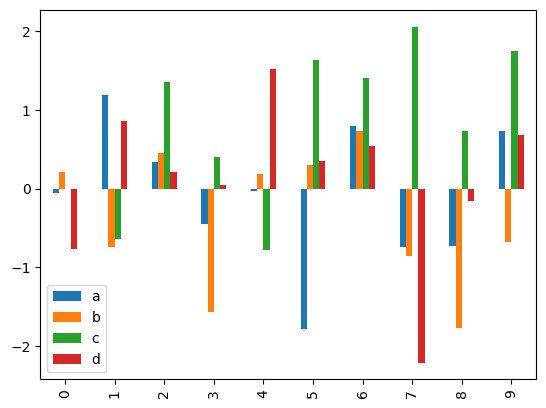

In [90]:
df.plot.bar();

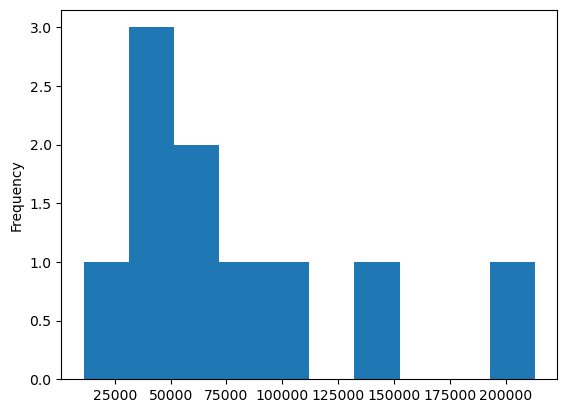

In [97]:
# plotting with histograms
car_sales["Odometer (KM)"].plot.hist(bins = 10);

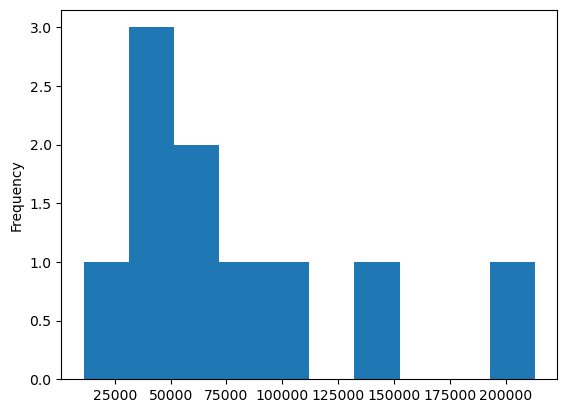

In [98]:
car_sales["Odometer (KM)"].plot(kind = "hist");

In [100]:
# let's try on another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


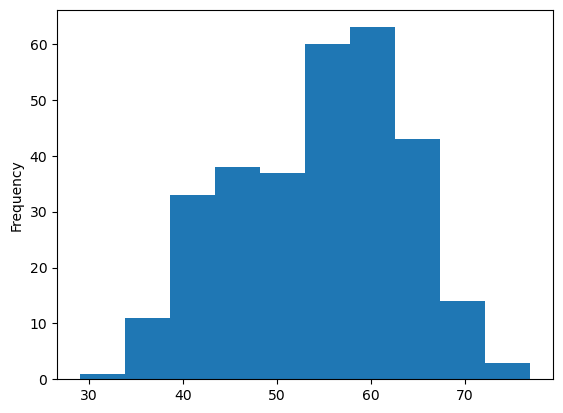

In [103]:
# create a histogram of age
heart_disease["age"].plot.hist();

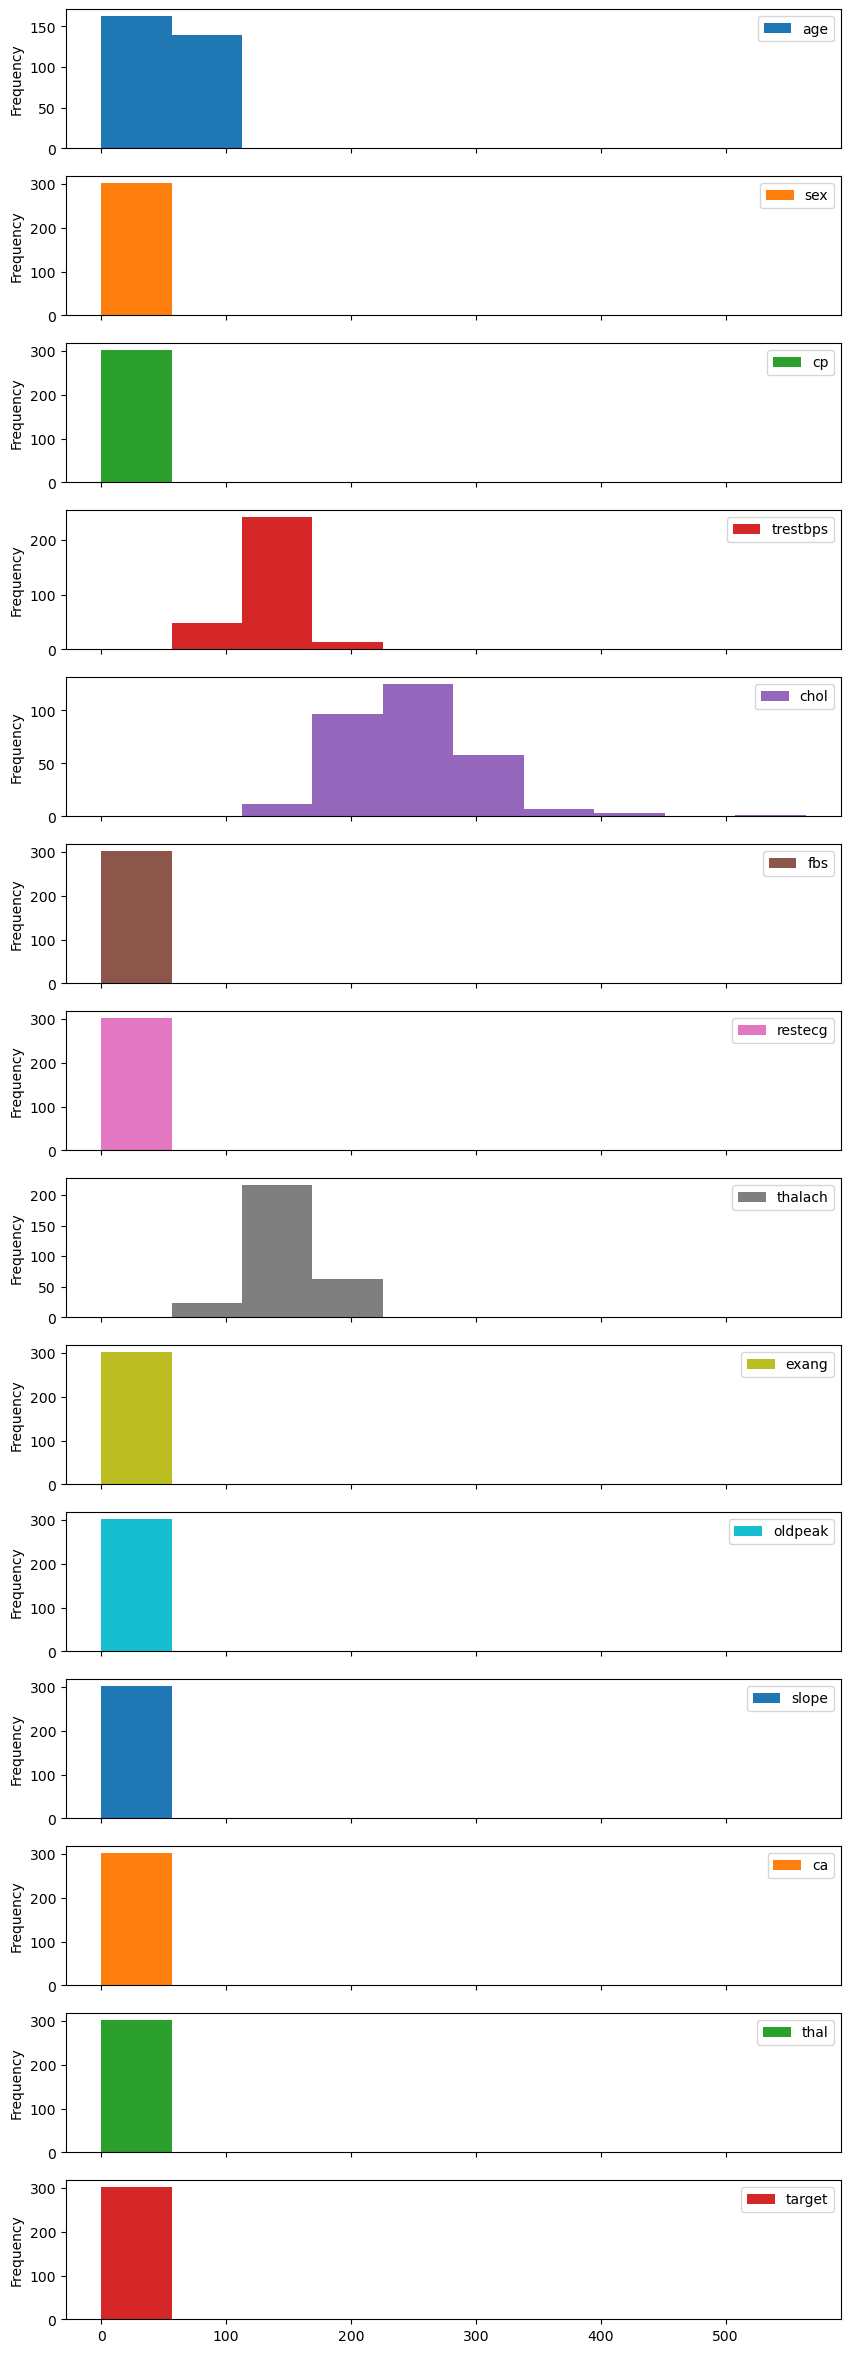

In [107]:
heart_disease.plot(subplots=True, figsize = (10, 30), kind="hist");

### Which one should you use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced, use to OO method

In [111]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


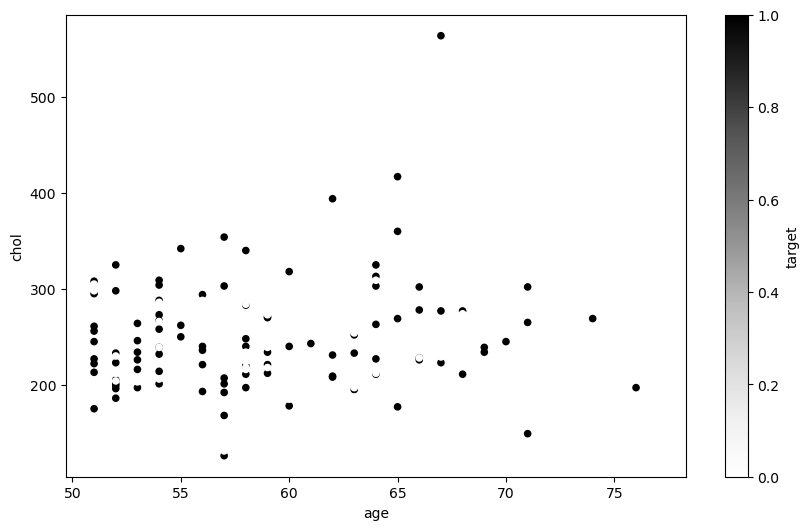

In [117]:
# pyplot method
over_50.plot(kind = "scatter",
             x = "age",
             y = "chol",
             c = "target",
             figsize = (10, 6)
            );

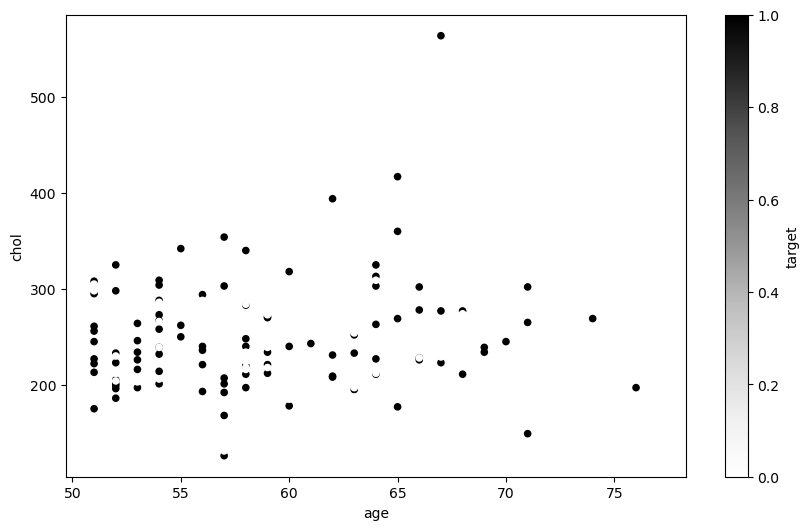

In [123]:
# OO method mixed with pyplot method
fig, ax = plt.subplots(figsize = (10, 6))
over_50.plot(kind = "scatter",
             x = "age",
             y = "chol",
             c = "target",
             ax = ax
            );
# ax.set_xlim([45, 100]);

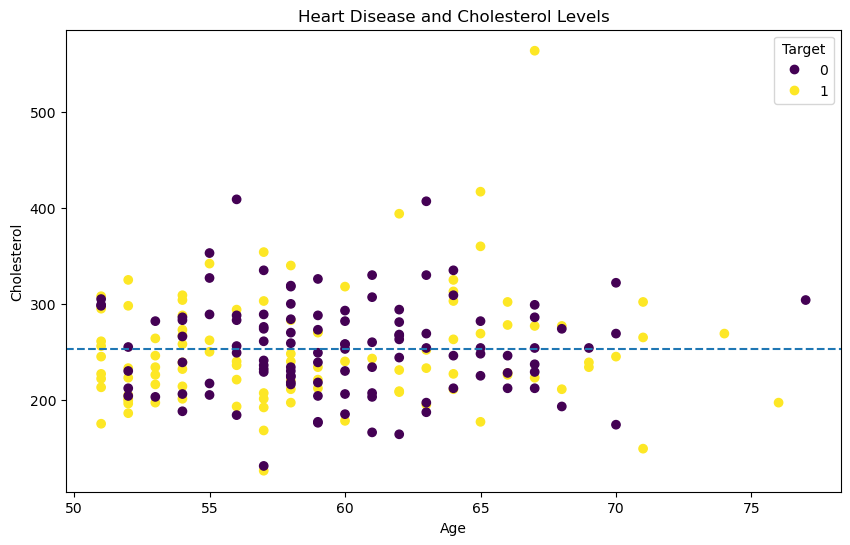

In [129]:
# OO method from scratch
fig, ax = plt.subplots(figsize = (10, 6))

scatter = ax.scatter(x = over_50["age"],
                     y = over_50["chol"],
                     c = over_50["target"]
                    );

# customise the plot
ax.set(title = "Heart Disease and Cholesterol Levels", 
       xlabel = "Age",
       ylabel = "Cholesterol"
      );

# Add a legend
ax.legend(*scatter.legend_elements(), title = "Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(), ls="--");

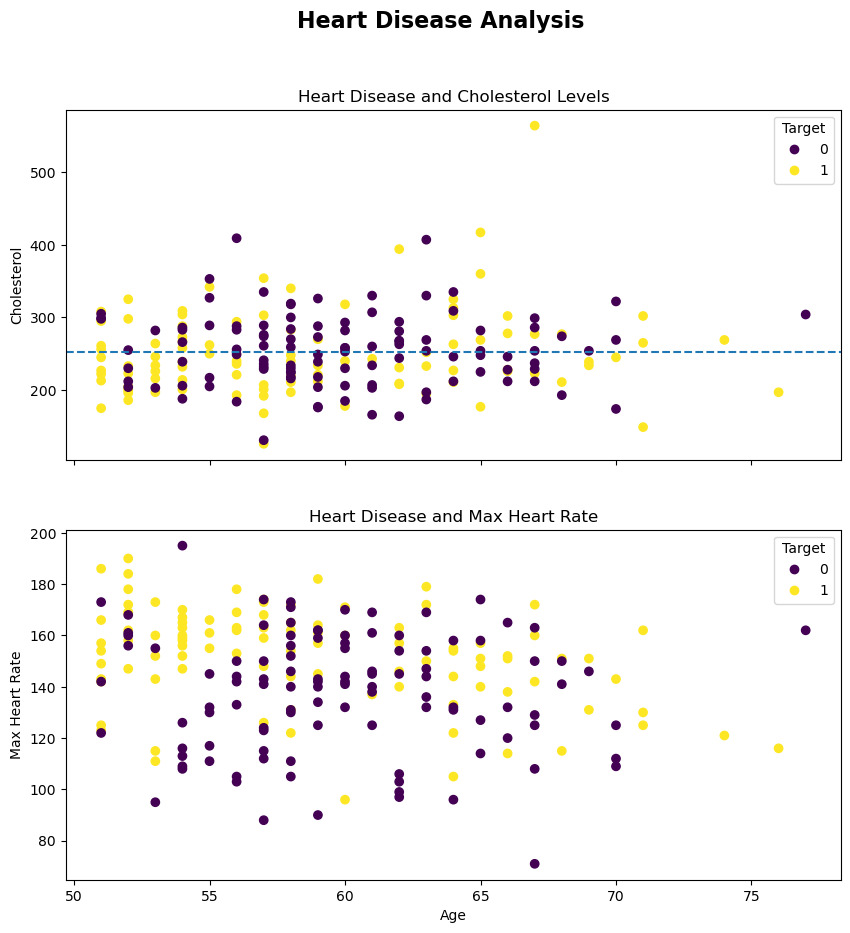

In [146]:
# subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                               figsize = (10, 10),
                               sharex = True
                              );

# add data to ax0
scatter = ax0.scatter(x = over_50["age"],
         y = over_50["chol"],
         c = over_50["target"],
        );

# add a legend
ax0.legend(*scatter.legend_elements(), title = "Target");

# Customise ax0
ax0.set(title = "Heart Disease and Cholesterol Levels", 
       ylabel = "Cholesterol"
      );

# add a meanline
ax0.axhline(over_50["chol"].mean(), linestyle = "--");

# add data ax1
scatter = ax1.scatter(x = over_50["age"],
                      y = over_50["thalach"],
                      c = over_50["target"]
                     );

# add a legend 
ax1.legend(*scatter.legend_elements(), title = "Target");

# customise ax1
ax1.set(title = "Heart Disease and Max Heart Rate",
        ylabel = "Max Heart Rate",
        xlabel = "Age"
       );

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize = 16, fontweight = "bold");

## Customising Matplotlib plots and getting stylish

In [148]:
# See the different style available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [149]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2023-01-01,4000
1,Honda,Red,87899,4,5000,2023-01-02,9000
2,Toyota,Blue,32549,3,7000,2023-01-03,16000
3,BMW,Black,11179,5,22000,2023-01-04,38000
4,Nissan,White,213095,4,3500,2023-01-05,41500


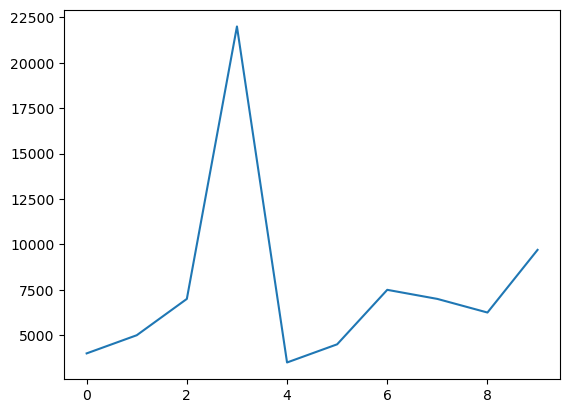

In [153]:
car_sales["Price"].plot();

In [158]:
# update the style
plt.style.use("seaborn-v0_8-whitegrid")

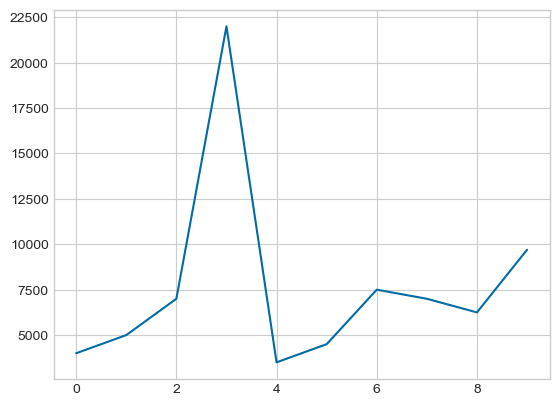

In [160]:
car_sales["Price"].plot();

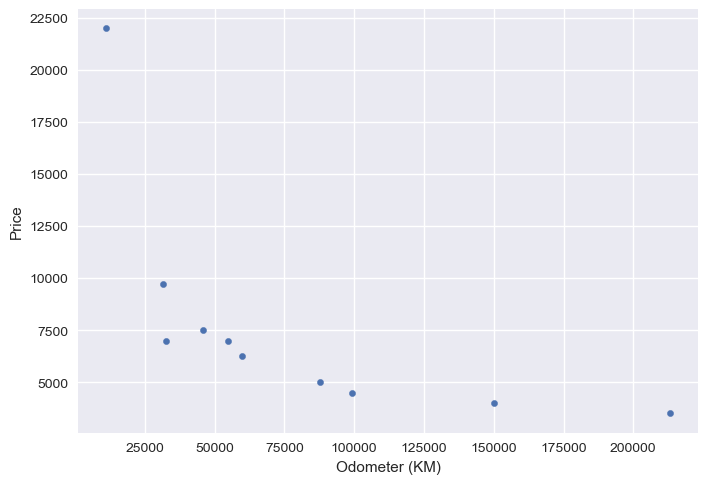

In [163]:
plt.style.use("seaborn-v0_8")
car_sales.plot(x = "Odometer (KM)", y = "Price", kind = "scatter");

In [164]:
# create some data
x = np.random.randn(10, 4)
x

array([[ 0.60838234, -1.68963335, -0.89683518, -1.08775041],
       [ 0.66254366, -1.15898657,  0.0570467 , -0.97409561],
       [ 0.75205042,  1.40510347,  0.15889082, -1.06481842],
       [ 1.0659524 , -0.15129875, -0.61881789, -1.74502313],
       [-0.35837316, -1.57798575,  0.45921542,  1.19325881],
       [ 0.78695043,  0.70811651, -0.78511911, -0.20897141],
       [ 2.14421262, -1.32158233, -0.81002146,  0.46272982],
       [-0.06841203,  1.73053326,  1.06170333,  0.85663677],
       [ 0.25668813, -0.62161903,  0.98015936,  0.35735658],
       [-0.07254204,  1.94725811,  0.13789402,  1.54430748]])

In [165]:
df = pd.DataFrame(x, columns = ["a", "b", "c", "d"])
df

,a,b,c,d
0,0.608382,-1.689633,-0.896835,-1.087750
1,0.662544,-1.158987,0.057047,-0.974096
2,0.752050,1.405103,0.158891,-1.064818
3,1.065952,-0.151299,-0.618818,-1.745023
4,-0.358373,-1.577986,0.459215,1.193259
5,0.786950,0.708117,-0.785119,-0.208971
6,2.144213,-1.321582,-0.810021,0.462730
7,-0.068412,1.730533,1.061703,0.856637
8,0.256688,-0.621619,0.980159,0.357357
9,-0.072542,1.947258,0.137894,1.544307


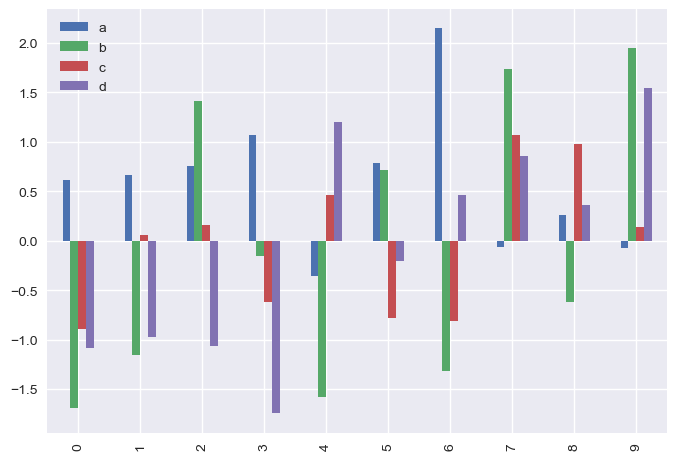

In [167]:
ax = df.plot(kind = "bar");

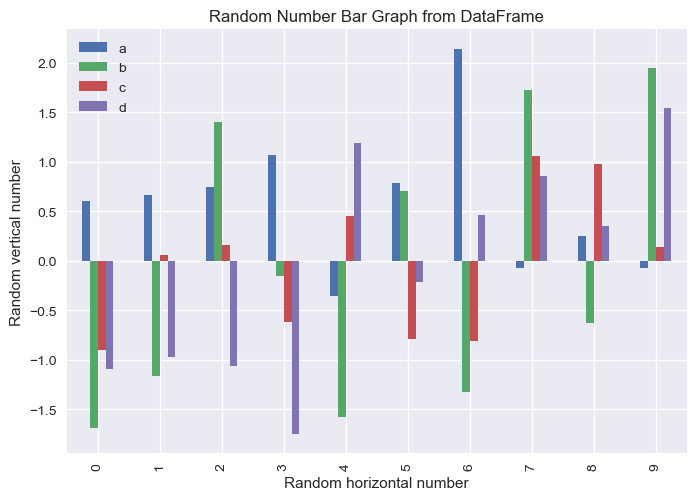

In [170]:
# Customise our plot with the set() method
ax = df.plot(kind = "bar")
ax.set(title = "Random Number Bar Graph from DataFrame",
       xlabel = "Random horizontal number",
       ylabel = "Random vertical number"
      );
ax.legend().set_visible(True);

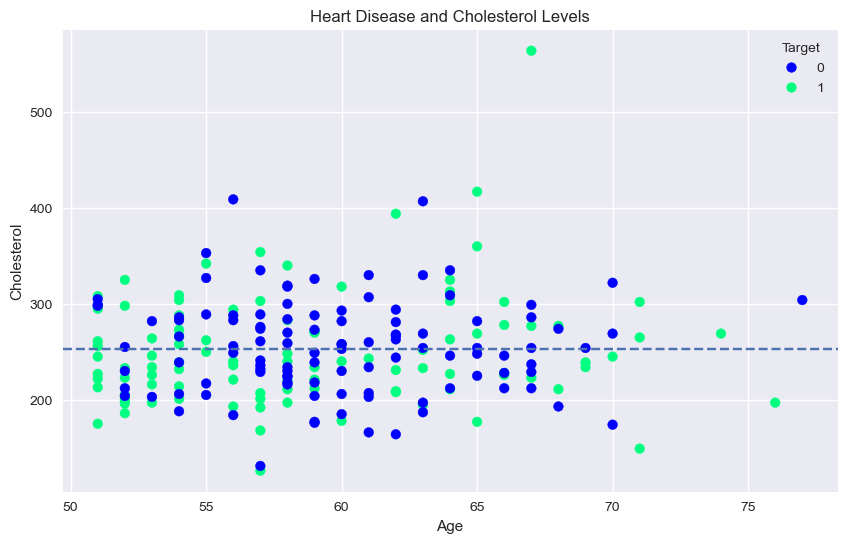

In [174]:
# set the style
plt.style.use("seaborn-v0_8-notebook")

# OO method from scratch
fig, ax = plt.subplots(figsize = (10, 6))

scatter = ax.scatter(x = over_50["age"],
                     y = over_50["chol"],
                     c = over_50["target"],
                     cmap = "winter"
                    );

# customise the plot
ax.set(title = "Heart Disease and Cholesterol Levels", 
       xlabel = "Age",
       ylabel = "Cholesterol"
      );

# Add a legend
ax.legend(*scatter.legend_elements(), title = "Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(), ls="--");

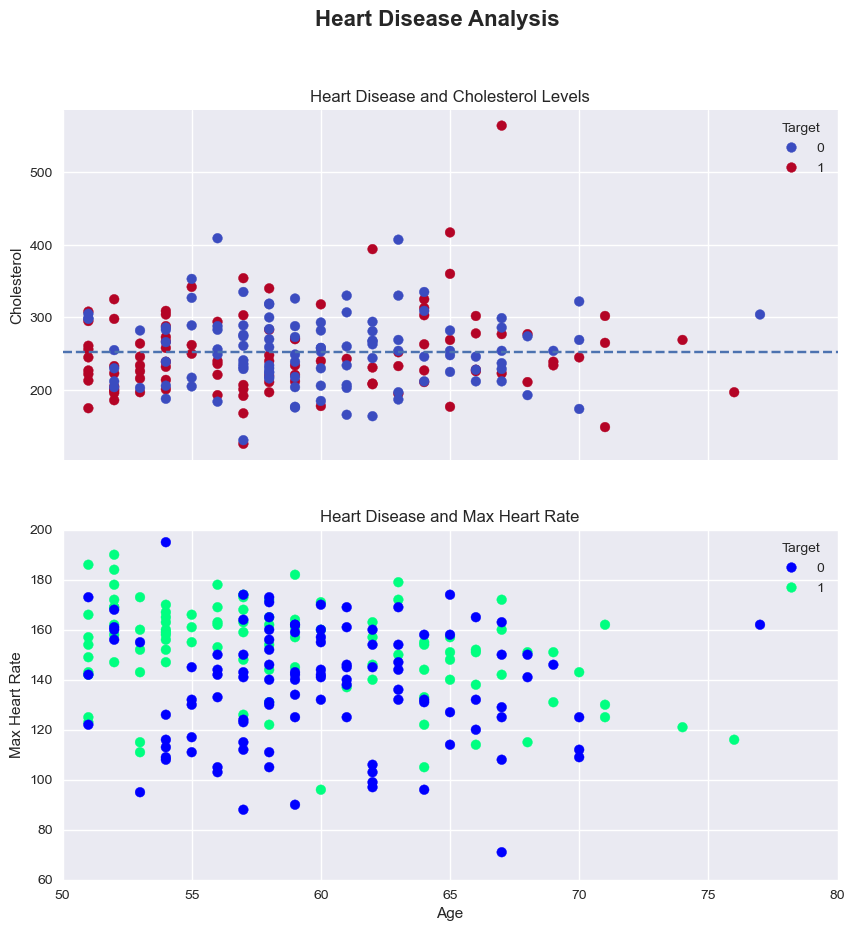

In [181]:
# Customise x and y axes limitation

# subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows = 2,
                               ncols = 1,
                               figsize = (10, 10),
                               sharex = True,
                              );

# add data to ax0
scatter = ax0.scatter(x = over_50["age"],
         y = over_50["chol"],
         c = over_50["target"],
         cmap = "coolwarm"
        );

# change the x axis limits
ax0.set_xlim([50, 80])

# add a legend
ax0.legend(*scatter.legend_elements(), title = "Target")

# Customise ax0
ax0.set(title = "Heart Disease and Cholesterol Levels", 
       ylabel = "Cholesterol"
      )

# add a meanline
ax0.axhline(over_50["chol"].mean(), linestyle = "--")

# add data ax1
scatter = ax1.scatter(x = over_50["age"],
                      y = over_50["thalach"],
                      c = over_50["target"],
                      cmap = "winter"
                     )

# add a legend 
ax1.legend(*scatter.legend_elements(), title = "Target")

# Change the y-axis limits
ax1.set_ylim([60, 200])

# customise ax1
ax1.set(title = "Heart Disease and Max Heart Rate",
        ylabel = "Max Heart Rate",
        xlabel = "Age"
       );

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize = 16, fontweight = "bold");